<a href="https://colab.research.google.com/github/Akash-mahandargi/Basic-Projects-/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import docx
doc = docx.Document("/content/Clustering Analysis.docx")
document_content = ""
for para in doc.paragraphs:
    document_content += para.text + "\n"

print(document_content)

In [11]:
import pandas as pd

df = pd.read_excel("/content/EastWestAirlines.xlsx", sheet_name="data")
display(df.head())
display(df.info())

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


None

In [12]:
from sklearn.preprocessing import StandardScaler

features = df.drop('ID#', axis=1)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
display(scaled_df.head())

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


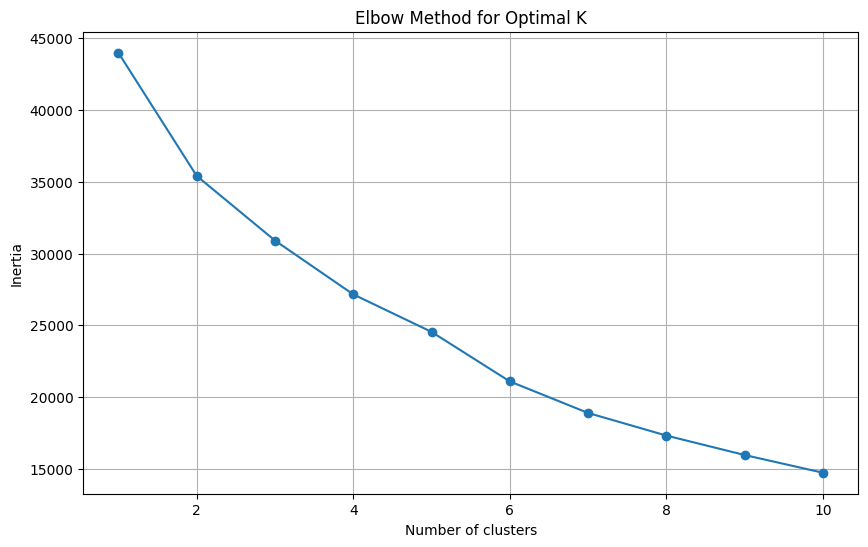

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,kmeans_cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3


In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

optimal_k = 5
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_clusters = kmeans_model.fit_predict(scaled_df)

df['kmeans_cluster'] = kmeans_clusters
display(df.head())

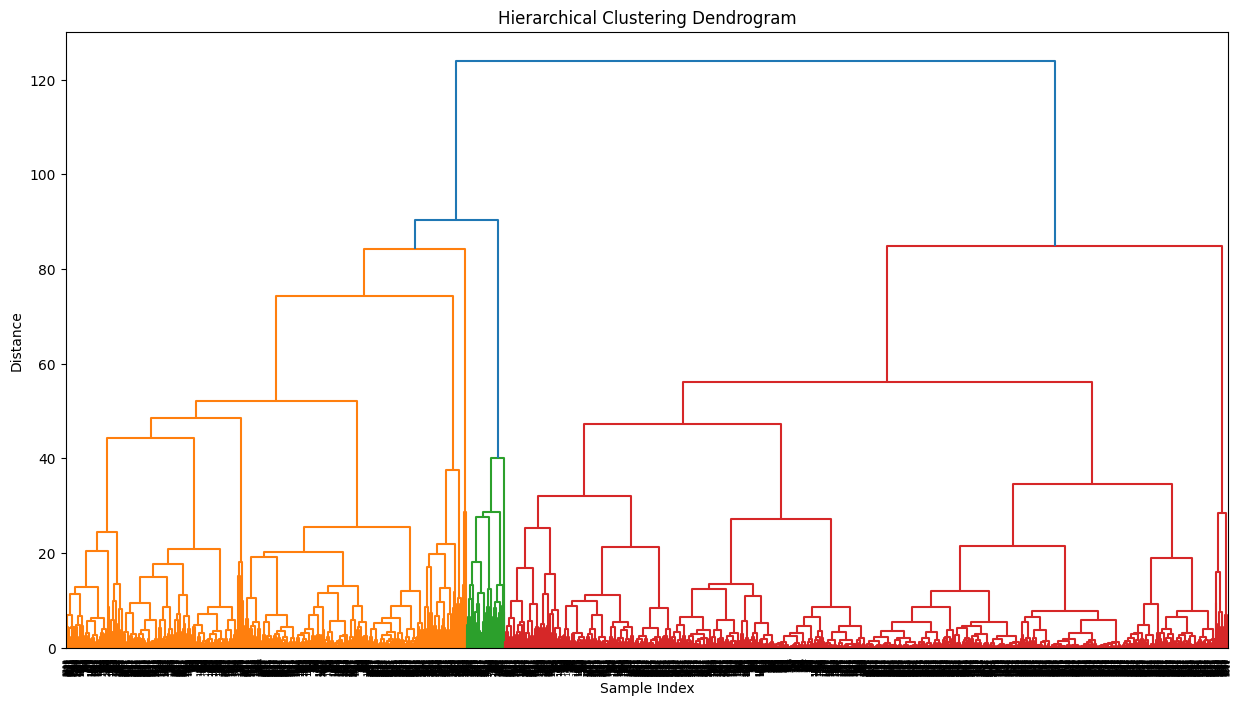

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,kmeans_cluster,hierarchical_cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3,5


In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

linked = linkage(scaled_df, method='ward')

plt.figure(figsize=(15, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

hierarchical_clusters = fcluster(linked, 5, criterion='maxclust')

df['hierarchical_cluster'] = hierarchical_clusters
display(df.head())

In [15]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(scaled_df)

df['dbscan_cluster'] = dbscan_clusters
display(df.head())

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,kmeans_cluster,hierarchical_cluster,dbscan_cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,2,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,2,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,2,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,2,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3,5,-1


In [16]:
print("K-Means Cluster Analysis:")
display(df.groupby('kmeans_cluster')[features.columns].mean())

print("\nHierarchical Cluster Analysis:")
display(df.groupby('hierarchical_cluster')[features.columns].mean())

print("\nDBSCAN Cluster Analysis:")
display(df.groupby('dbscan_cluster')[features.columns].mean())

K-Means Cluster Analysis:


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
kmeans_cluster,,,,,,,,,,,
0,43837.679305,43.855450,1.226698,1.019352,1.000395,4753.095972,6.969194,200.140600,0.624408,3711.462875,0.203002
1,119660.491803,5351.065574,2.000000,1.000000,1.000000,18683.475410,12.229508,963.639344,2.868852,3971.491803,0.557377
2,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
3,117361.299839,56.463826,3.721061,1.002412,1.001608,39502.667203,18.836817,346.309486,1.032154,4882.864148,0.648714
4,190251.952381,458.734694,2.224490,1.040816,1.000000,32907.979592,28.231293,5685.823129,16.523810,4673.081633,0.802721



Hierarchical Cluster Analysis:


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
hierarchical_cluster,,,,,,,,,,,
1,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
2,46329.336877,9.028618,1.244072,1.000000,1.000000,4868.112428,6.907604,214.812756,0.673753,3769.337694,0.184383
3,134880.892308,393.323077,2.430769,1.000000,1.000000,36582.169231,29.338462,5915.523077,16.638462,4599.607692,0.753846
4,129951.388889,65.666667,3.388889,1.000000,3.722222,86259.888889,26.222222,422.222222,1.333333,4488.777778,0.500000
5,116134.226872,367.779736,3.500000,1.000000,1.000000,36501.331865,17.958884,376.402349,1.147577,4699.638767,0.665198



DBSCAN Cluster Analysis:


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
dbscan_cluster,,,,,,,,,,,
-1,134500.365888,407.865534,2.685775,1.036801,1.034678,31603.530078,17.836518,1193.485492,3.496108,4690.736023,0.590234
0,28053.443909,0.000000,1.000000,1.000000,1.000000,1946.549897,4.842395,57.693737,0.217481,3482.193393,0.000000
1,29113.324627,0.000000,1.000000,1.000000,1.000000,3672.082090,4.929104,146.432836,0.470149,4031.078358,1.000000
2,53130.400000,0.000000,2.000000,1.000000,1.000000,11096.400000,21.600000,50.000000,0.200000,6981.000000,0.000000
3,50411.552632,0.000000,4.000000,1.000000,1.000000,37148.166667,15.342105,60.666667,0.210526,4715.043860,1.000000
4,101333.108108,0.000000,4.000000,1.000000,1.000000,36288.072072,15.648649,20.720721,0.063063,4702.090090,0.000000
5,75997.736170,0.000000,3.000000,1.000000,1.000000,17846.829787,14.663830,37.425532,0.131915,4040.851064,0.000000
6,41971.895954,0.000000,3.000000,1.000000,1.000000,18654.855491,15.393064,42.196532,0.173410,4425.248555,1.000000
7,138516.800000,0.000000,2.000000,1.000000,1.000000,8307.800000,11.600000,0.000000,0.000000,7823.200000,0.000000


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
scaled_features_pca = pca.fit_transform(scaled_df)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(scaled_features_pca[:, 0], scaled_features_pca[:, 1], c=df['kmeans_cluster'], cmap='viridis', marker='o')
plt.title('K-Means Clustering (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(1, 3, 2)
plt.scatter(scaled_features_pca[:, 0], scaled_features_pca[:, 1], c=df['hierarchical_cluster'], cmap='viridis', marker='o')
plt.title('Hierarchical Clustering (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(1, 3, 3)
plt.scatter(scaled_features_pca[:, 0], scaled_features_pca[:, 1], c=df['dbscan_cluster'], cmap='viridis', marker='o')
plt.title('DBSCAN Clustering (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

In [17]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

print("K-Means Evaluation Metrics:")
print(f"Silhouette Score: {silhouette_score(scaled_df, df['kmeans_cluster'])}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(scaled_df, df['kmeans_cluster'])}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_score(scaled_df, df['kmeans_cluster'])}")

print("\nHierarchical Evaluation Metrics:")
print(f"Silhouette Score: {silhouette_score(scaled_df, df['hierarchical_cluster'])}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(scaled_df, df['hierarchical_cluster'])}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_score(scaled_df, df['hierarchical_cluster'])}")

# DBSCAN evaluation requires handling noise points (-1 cluster)
# For silhouette and Davies-Bouldin, we can exclude noise points for a more meaningful score
dbscan_silhouette_score = 'N/A'
dbscan_davies_bouldin_score = 'N/A'
dbscan_calinski_harabasz_score = 'N/A'

# Check if there are more than one cluster and at least 2 samples not in the noise cluster
if len(set(df['dbscan_cluster'])) > 1 and len(df[df['dbscan_cluster'] != -1]) >= 2:
    dbscan_silhouette_score = silhouette_score(scaled_df[df['dbscan_cluster'] != -1], df['dbscan_cluster'][df['dbscan_cluster'] != -1])
    dbscan_davies_bouldin_score = davies_bouldin_score(scaled_df[df['dbscan_cluster'] != -1], df['dbscan_cluster'][df['dbscan_cluster'] != -1])
    dbscan_calinski_harabasz_score = calinski_harabasz_score(scaled_df[df['dbscan_cluster'] != -1], df['dbscan_cluster'][df['dbscan_cluster'] != -1])


print("\nDBSCAN Evaluation Metrics:")
print(f"Silhouette Score (excluding noise): {dbscan_silhouette_score}")
print(f"Davies-Bouldin Index (excluding noise): {dbscan_davies_bouldin_score}")
print(f"Calinski-Harabasz Index (excluding noise): {dbscan_calinski_harabasz_score}")

print("\nComparison of Clustering Algorithms:")
print("K-Means produced well-defined spherical clusters based on the mean analysis, and the visualization shows distinct groups. The evaluation metrics provide quantitative measures of cluster quality.")
print("Hierarchical clustering also shows distinct clusters in the visualization and mean analysis, with the dendrogram providing insight into the merging process. The evaluation metrics offer a comparison point with K-Means.")
print("DBSCAN identified several smaller, dense clusters and a large number of noise points. The evaluation metrics, when calculated on non-noise points, can indicate the quality of the identified dense regions. However, the high number of noise points might suggest the chosen parameters (eps, min_samples) might need tuning depending on the desired outcome.")

K-Means Evaluation Metrics:
Silhouette Score: 0.3188772727741292
Davies-Bouldin Index: 1.0892251375800304
Calinski-Harabasz Index: 791.2490369251436

Hierarchical Evaluation Metrics:
Silhouette Score: 0.3098805307874414
Davies-Bouldin Index: 1.127719714976431
Calinski-Harabasz Index: 753.6612139440763

DBSCAN Evaluation Metrics:
Silhouette Score (excluding noise): 0.14397923390835202
Davies-Bouldin Index (excluding noise): 1.299595603921993
Calinski-Harabasz Index (excluding noise): 296.6991072800718

Comparison of Clustering Algorithms:
K-Means produced well-defined spherical clusters based on the mean analysis, and the visualization shows distinct groups. The evaluation metrics provide quantitative measures of cluster quality.
Hierarchical clustering also shows distinct clusters in the visualization and mean analysis, with the dendrogram providing insight into the merging process. The evaluation metrics offer a comparison point with K-Means.
DBSCAN identified several smaller, dense c

In [18]:
df.to_excel("EastWestAirlines_Clustered.xlsx", index=False)